<a href="https://colab.research.google.com/github/RuanOliveiragf/topicos_1_codigos/blob/main/IAM_AVA01_ruanoliveiradejesus_lucycassiacerqueirasilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [47]:
from IPython.core.display import display, HTML
from ucimlrepo import fetch_ucirepo
import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
html_code = """
<div style="display: flex; align-items: center;flex-direction: column;">

  <div style="display: flex; max-height: 200px; margin-bottom:20px;">

      <img src="https://www.siglaseabreviaturas.com/wp-content/uploads/2014/01/brasao-ufba-siglas.png" alt="UFBA Logo" style="width:130px; margin-right: 30px">

      <div style="margin-top:20px;">
          <p><strong>Universidade Federal da Bahia</strong></p>
          <p><strong>Escola Politécnica</strong></p>
          <p><strong>Departamento de Engenharia Elétrica e de Computação</strong></p>
          <p><strong>Disciplina:</strong> Introdução ao Aprendizado de Máquina (ENGG67)</p>
          <p><strong>Professor:</strong> Antônio C. L. Fernandes Jr.</p>
          <p><strong>Alunos(as):</strong> Ruan Oliveira de Jesus, Lucy Cássia Cerqueira Silva</p>
          <p><strong>Data de apresentação e entrega:</strong> 22/04/2025</p>
      </div>

  </div>

  <p style="font-weight: bold; font-size: 24px;">Avaliação 01</p>
</div>
"""
display(HTML(html_code))

### Questão 1 (A)

Sob o contexto da análise de dados, a possibilidade de extração de informações úteis é de suma importância. A análise descritiva dos atributos de um conjunto de dados (dataset) é fundamental para uma análise inicial e, assim também obter-se uma maior afinidade com o objeto de estudo.

Um conjundo de dados denominado **univariado** é aquele que contém **apenas uma variável/atributo**, ou seja, trata-se de um conjunto **unidimensional**. Sob esse viés, os conjuntos de dados multivariados são aqueles que possuem **duas ou mais variáveis/atributos** que podem estar relacionados, podendo ser denominado tambem como conjunto **multidimensional**. Assim, dado a multiplicidade de atributos e relações entre variáveis, as correlações e interdependencias, o nivel de complexidade em um conjunto multivariado torna-se maior, e sua análise exploratória e pré-processamento mais complexos.

No presente trabalho, utilizou-se o *Breast Cancer Wisconsin (Diagnostic) Dataset*, um **conjunto de dados multivariado**, pois como descrito anteriormente, a multpiclicidade de atribuos/variáveis o torna um conjunto multivariado, dado o fato também de que cada objeto apresenta mais de um atributo.

Cada instância/linha representa um tumor descrito por 31 atributos (ex.: diágnostico, raio, textura, perímetro, área, suavidade, compactação, concavidade, pontos côncavos, simetria, dimensão fractal, etc).

In [ ]:

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

df_variables = breast_cancer_wisconsin_diagnostic.variables
df_variables_filtered = df_variables[['name', 'role', 'type']]

df_variables_filtered


,name,role,type
0,ID,ID,Categorical
1,Diagnosis,Target,Categorical
2,radius1,Feature,Continuous
3,texture1,Feature,Continuous
4,perimeter1,Feature,Continuous
5,area1,Feature,Continuous
6,smoothness1,Feature,Continuous
7,compactness1,Feature,Continuous
8,concavity1,Feature,Continuous
9,concave_points1,Feature,Continuous


Como demonstrado acima, podemos ter uma grande variedade de atributos os quais vão poder ser classificados como atributos alvos, e atributos preditivos.

Um **atributo alvo** (também chamado de atributo meta ou de saída) é aquele que se deseja prever. Usualmente, os dados tendem a apresentar apenas um atributo alvo, que dado o contexto deste trabalho, trata-se do atributo Diagnosis (diagnóstico)

A existência desse tipo de atributo dentro do conjunto de dados depende do tipo de análise que será realizada:

*   As tarefas **descritivas** não possuem esse tipo de atributo, pois eles serão obtidos após a análise dos dados existentes.

*   As tarefas **preditivas** (classificação ou regressão) possuem esse tipo de atributo, pois eles serão utilizados para predizer novos dados.

Como dito anteriormente, o conjunto *Breast Cancer Wisconsin Dataset* possui **apenas um atributo alvo**, o *Diagnosis*, que classifica esses tumores como benignos (B) ou malignos (M).

Ademais, um **atributo preditivo** trata-se de uma característica dentro do conjunto de dados que é utilizada para prever ou explicar uma outra variável.

Abaixo segue a lista dos atributos alvos ( *target* ).

In [ ]:
df_variables = breast_cancer_wisconsin_diagnostic.variables

targets = df_variables[df_variables['role'] == 'Target'][['name', 'role']]
qtd_target = len(targets)

print("Total of targets: ", qtd_target)
targets

Total of targets:  1


,name,role
1,Diagnosis,Target


Todos os outros 30 atributos são **descritivos/preditores**. Segue a lista abaixo:

In [ ]:
df_variables = breast_cancer_wisconsin_diagnostic.variables

features = df_variables[df_variables['role'] == 'Feature'][['name', 'role']]
qtd_features = len(features)

print("Total of features: ", qtd_features)
features

Total of features:  30


,name,role
2,radius1,Feature
3,texture1,Feature
4,perimeter1,Feature
5,area1,Feature
6,smoothness1,Feature
7,compactness1,Feature
8,concavity1,Feature
9,concave_points1,Feature
10,symmetry1,Feature
11,fractal_dimension1,Feature


Por fim, uma vez que o atributo alvo é categórico e possui um valor binário, é possível concluir que o dataset utilizado para essa avaliação trata-se de um **problema de classificação**.

### Questão 1 (B)

**Caracterize os dados quanto ao Tipo e Escala**

A caraterização dos dados constitui uma etapa de fundamental importancia para a análise dados. Os Valores que um atributo pode assumir podem ter diferentes formas e podem ser definidos por dois aspectos principais que são o tipo e a escala.

- **Tipo:** diz respeito ao grau de quantização nos dados. Vai definir se o atributo representa quantidades, sendo denominado **quantitativo ou numérico**, ou qualidade, quando é chamado de **qualitativo**, simbólico ou categórico pois, como sugere a definição, podem ser associados a categorias, os dados qualitativos podem ser ordenados, mas sem orpeações aritiméticas aplicáveis.
  - Atributos contínuos podem assumir números infínitos de valores, usualmente sao resultados de medidas.
  - Atributos discretos contem um numero finito ou infinito contável de valores (como valores binários)

- **Escala:** define as operações que podem ser realizadas nos valores de um atributo
  - **Nominal:** os valores são nomes diferentes, carregam a menor quantidade de informação possivel
  - **Ordinal:** podem ser ordenados, e refletem tambem uma ordem de categorias representadas (hierarquia militar, pequeno, medio, grande)
  - **Intervalar:** são atributos que possuem valores que variam dentro de um determinado intervalo, como esvalas de temperatura)
  - **Racional:** São aqueles que mais carregam informação. Possuem um zero absoluto, ou seja, existe um zero junto com uma unidade de medida de modo que a razão tem significado.

Abaixo segue uma análise da caracterização dos dados do dataset quanto ao Tipo e Escala:

<div style="text-align: center;">

| Variável                                                   | Tipo         | Escala    |
|------------------------------------------------------------|--------------|-----------|
| ID number                                                  | Qualitativo  | Nominal   |
| Diagnosis                       | Qualitativo  | Nominal   |
| Radius  | Quantitativo | Racional  |
| Texture          | Quantitativo | Racional  |
| Perimeter                                                  | Quantitativo | Racional  |
| Area                                                       | Quantitativo | Racional  |
| Smoothness              | Quantitativo | Racional  |
| Compactness                     | Quantitativo | Racional  |
| Concavity     | Quantitativo | Racional  |
| Concave points  | Quantitativo | Racional  |
| Symmetry                                                   | Quantitativo | Racional  |
| Fractal dimension          | Quantitativo | Racional  |

</div>

**>>>>>>>>>REVISAR DEPOIS COM FABIO E LUCY<<<<<<<<<<**

### Questão 1 (C)

**Verifique	a	necessidade	de	balanceamento	dos	dados	e	caracterize	estatisticamente	os	dados	(calcule,	para	cada	atributo,
 suas	estatísticas	univariadas	pertinentes	dentre	frequência,	moda,	média,	mediana,	desvio-padrão,	Q1,	Q3,	obliquidade	e
 curtose).**

 A exploração de dados constitui uma parte de fundamental importância para a melhor extração de informações úteis em um conjunto de dados. Sob esse viés, através da extração e análise de determinadas medidas (utilizadas na estatística descritiva) é possivel visualizar de forma mais concisa todo o conjunto de dados, de forma a ressaltar medidas especificas e analisar padrões, desvios, e distorções nos valores do conjunto de dados.

 Para este trabalho, é possível utilizarmos algumas das medidas estatiscas como:

 - **Frequência:** A frequência refere-se ao número de vezes que um determinado valor ou conjunto de valores ocorre em um conjunto de dados.
 - **Média:** A média é a soma de todos os valores em um conjunto de dados dividida pelo número de valores. È uma medida de tendência central que representa o "centro" dos dados.
 - **Moda:** A moda é o valor que ocorre com mais frequência em um conjunto de dados.
 - **Mediana:** A mediana é o valor no meio de um conjunto de dados ordenado. Se o número de valores for par, a mediana é a média dos dois valores centrais. Ela divide o conjunto de dados em duas partes iguais.
 - **Desvio-padrão:** O desvio-padrão é uma medida de dispersão que indica o quanto, em média, cada valor de um conjunto de dados difere da média do conjunto. Ele fornece uma ideia da quantidade de variabilidade ou dispersão dos dados.
 - **Obliquidade:** Obliquidade mede a assimetria de uma distribuição de dados. Se a obliquidade for zero, a distribuição é perfeitamente simétrica. Um valor positivo indica que a cauda direita da distribuição é mais longa ou cheia, enquanto um valor negativo indica o contrário.
 - **Quartis (Q1 e Q3):** Os quartis são valores que dividem um conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que separa o primeiro 25% dos dados ordenados, enquanto o terceiro quartil (Q3) separa os 75% dos dados ordenados. A diferença entre Q3 e Q1 é chamada de intervalo interquartil (IQR), que é uma medida de dispersão.
 - **Curtose:** A curtose mede a "curtidez" ou o "achatamento" da distribuição dos dados em comparação com uma distribuição normal.

Abaixo segue o calculo dessas medidas para o *dataset* fornecido:



In [ ]:
# oncatenate features and targets into a single dataframe
dataframe = pd.concat([X, y], axis=1)

# Listar todas as colunas
todas_as_colunas = dataframe.columns.tolist()

# Encontrar os índices das colunas de início e fim
inicio = todas_as_colunas.index('radius2')
fim = todas_as_colunas.index('Diagnosis') + 1  # Inclui 'Diagnosis' na seleção

# Selecionar as colunas a serem deletadas
colunas_para_deletar = todas_as_colunas[inicio:fim]

# Deletar as colunas do DataFrame
dataframe_coluna1 = dataframe.drop(colunas_para_deletar, axis=1)

# Exibir o DataFrame modificado
#print(dataframe.head())

#------------------------------------CALCULO DAS MEDIDAS ESTATISTICAS------------------------------------#
def calcular_media_por_atributo(dataframe):
    medias = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        medias[coluna] = dataframe[coluna].mean()
    return medias

def calcular_moda_por_atributo(dataframe):
    modas = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        modas[coluna] = dataframe[coluna].mode().tolist()  # Convertendo para lista para melhor visualização
    return modas

def calcular_frequencia_por_atributo(dataframe):
    frequencias = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        frequencias[coluna] = dataframe[coluna].value_counts().to_dict()
    return frequencias

def calcular_mediana_por_atributo(dataframe):
    medianas = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        medianas[coluna] = dataframe[coluna].median()
    return medianas

def calcular_desvio_padrao_por_atributo(dataframe):
    desvios = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        desvios[coluna] = dataframe[coluna].std()
    return desvios

def calcular_obliquidade_por_atributo(dataframe):
    obliquidades = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        obliquidades[coluna] = skew(dataframe[coluna].dropna())  # dropna para lidar com valores faltantes
    return obliquidades

def calcular_quartis_por_atributo(dataframe):
    quartis = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        quartis[coluna] = {
            'Q1': dataframe[coluna].quantile(0.25),
            'Q3': dataframe[coluna].quantile(0.75)
        }
    return quartis

def calcular_curtose_por_atributo(dataframe):
    curtoses = {}
    for coluna in dataframe.select_dtypes(include='number').columns:
        curtoses[coluna] = kurtosis(dataframe[coluna].dropna())  # dropna para lidar com valores faltantes
    return curtoses

# Funções de cálculo já estão definidas no seu código

# Calcular todas as estatísticas
media_por_atributo = calcular_media_por_atributo(dataframe_coluna1)
moda_por_atributo = calcular_moda_por_atributo(dataframe_coluna1)
mediana_por_atributo = calcular_mediana_por_atributo(dataframe_coluna1)
desvio_padrao_por_atributo = calcular_desvio_padrao_por_atributo(dataframe_coluna1)
obliquidade_por_atributo = calcular_obliquidade_por_atributo(dataframe_coluna1)
quartis_por_atributo = calcular_quartis_por_atributo(dataframe_coluna1)
curtose_por_atributo = calcular_curtose_por_atributo(dataframe_coluna1)

# Criar um DataFrame a partir das estatísticas calculadas
estatisticas_df = pd.DataFrame({
    'Média': pd.Series(media_por_atributo),
    'Mediana': pd.Series(mediana_por_atributo),
    'Desvio Padrão': pd.Series(desvio_padrao_por_atributo),
    'Obliquidade': pd.Series(obliquidade_por_atributo),
    'Curtose': pd.Series(curtose_por_atributo),
    'Moda': pd.Series({key: value[0] if value else np.nan for key, value in moda_por_atributo.items()}),  # Usa o primeiro valor da moda
    'Quartil 1': pd.Series({key: value['Q1'] for key, value in quartis_por_atributo.items()}),
    'Quartil 3': pd.Series({key: value['Q3'] for key, value in quartis_por_atributo.items()})
})

# Exibir o DataFrame de estatísticas
estatisticas_df

,Média,Mediana,Desvio Padrão,Obliquidade,Curtose,Moda,Quartil 1,Quartil 3
radius1,14.127292,13.37000,3.524049,0.939893,0.827584,12.34000,11.70000,15.78000
texture1,19.289649,18.84000,4.301036,0.648734,0.741145,14.93000,16.17000,21.80000
perimeter1,91.969033,86.24000,24.298981,0.988037,0.953165,82.61000,75.17000,104.10000
area1,654.889104,551.10000,351.914129,1.641391,3.609761,512.20000,420.30000,782.70000
smoothness1,0.096360,0.09587,0.014064,0.455120,0.837945,0.10070,0.08637,0.10530
compactness1,0.104341,0.09263,0.052813,1.186983,1.625140,0.11470,0.06492,0.13040
concavity1,0.088799,0.06154,0.079720,1.397483,1.970592,0.00000,0.02956,0.13070
concave_points1,0.048919,0.03350,0.038803,1.168090,1.046680,0.00000,0.02031,0.07400
symmetry1,0.181162,0.17920,0.027414,0.723695,1.266117,0.16010,0.16190,0.19570
fractal_dimension1,0.062798,0.06154,0.007060,1.301047,2.969017,0.05667,0.05770,0.06612


Para a análise do balanceamento de dados é necessario que analizemos a distribuição do Diagnosis (o atributo alvo deste dataset) quanto a sua frequência:

In [ ]:
frequencia_diagnosis = dataframe['Diagnosis'].value_counts()

# Calcular a porcentagem de cada classe
porcentagem_diagnosis = dataframe['Diagnosis'].value_counts(normalize=True) * 100

# Combinar a frequência e a porcentagem em um DataFrame
frequencia_porcentagem_df = pd.DataFrame({
    'Frequência': frequencia_diagnosis,
    'Porcentagem (%)': porcentagem_diagnosis
})

# Imprimir o resultado
print("Frequência e Porcentagem da coluna 'Diagnosis':")
frequencia_porcentagem_df

Frequência e Porcentagem da coluna 'Diagnosis':


,Frequência,Porcentagem (%)
Diagnosis,,
B,357,62.741652
M,212,37.258348


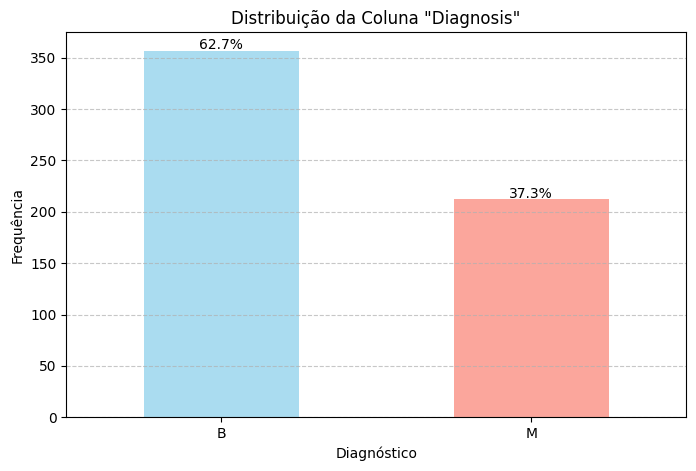

In [ ]:
# Plotar um gráfico de barras para a coluna "Diagnosis"
plt.figure(figsize=(8, 5))
frequencia_diagnosis.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)

plt.title('Distribuição da Coluna "Diagnosis"')
plt.xlabel('Diagnóstico')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar percentuais acima de cada barra usando iloc
for i, freq in enumerate(frequencia_diagnosis):
    plt.text(i, freq + 2, f'{porcentagem_diagnosis.iloc[i]:.1f}%', ha='center')

plt.show()


É possível observar que a diferença entre a quantidade de tumores benignos e malignos no conjunto de dados não é expressivamente significativa. Dessa forma, a aplicação de técnicas de balanceamento não se apresenta como uma exigência absoluta do ponto de vista estatístico.

Entretanto, considerando-se que o problema em questão está inserido no contexto da área médica, é fundamental buscar a maior precisão possível nas previsões realizadas pelo modelo. A classe majoritária no conjunto de dados corresponde aos tumores benignos, o que pode induzir o modelo a enviesar suas predições em favor dessa classe. Tal viés aumenta o risco da ocorrência de falsos negativos — ou seja, casos em que um tumor maligno é incorretamente classificado como benigno —, o que pode resultar em consequências clínicas gravíssimas, como o diagnóstico tardio da doença.

Dessa maneira, embora o balanceamento dos dados não seja estritamente necessário sob a ótica da distribuição das classes, sua realização é fortemente recomendável, sobretudo para mitigar os riscos associados a erros de classificação no diagnóstico médico.

Existem algumas formas de deixar o modelo mais preciso. As principais são: **oversampling, undersampling e class weight**.

O *oversampling*, ou superamostragem, consiste na adição de novas amostras à classe minoritária com o objetivo de equilibrar a proporção entre as classes do conjunto de dados. Esse equilíbrio pode ser alcançado por meio da replicação de exemplos existentes ou da geração de novos dados semelhantes com base nas características dos originais. No entanto, essa abordagem não é recomendada para o presente estudo, uma vez que se trata de dados médicos. Nessas situações, é fundamental que os dados reflitam com precisão a realidade clínica, evitando a criação de informações artificiais que possam comprometer a confiabilidade do modelo.

Em contrapartida, o *undersampling*, ou subamostragem, busca reduzir a discrepância entre as classes por meio da remoção de exemplos da classe majoritária. Essa remoção pode ser realizada de maneira aleatória ou por meio de estratégias mais criteriosas, como a eliminação de instâncias da classe majoritária que se encontram mais distantes das da classe minoritária. Essa última abordagem visa preservar os exemplos mais relevantes para a distinção entre as classes, contribuindo para que o modelo aprenda a reconhecer regiões de ambiguidade no espaço amostral.

Por fim, o método de *class weight* consiste na atribuição de pesos diferenciados para as classes durante o processo de treinamento do modelo, de forma que os erros cometidos na classe minoritária tenham maior impacto no ajuste dos parâmetros. Essa técnica é a mais recomendada para o presente caso, considerando que a diferença entre as proporções das classes majoritária e minoritária não é acentuada. Assim, evita-se a modificação direta do conjunto de dados, ao mesmo tempo em que se orienta o modelo a dedicar maior atenção à classe de maior relevância clínica — no caso, os tumores malignos —, reduzindo a probabilidade de falsos negativos e, consequentemente, aumentando a acurácia e a confiabilidade do diagnóstico automatizado.

### Questão 1 (D)

**Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído.**

Inicialmente, a título de verificação, iniciamos analisando a presença de dados duplicados, ou seja, vericamos se há objetos iguais (linhas dupblicadas).

In [15]:
import pandas as pd
if dataframe.duplicated().any():
    print("O dataset contém linhas duplicadas")
else:
    print("Não há linhas duplicadas no dataset.")

Não há linhas duplicadas no dataset.


Como é possível notar, não a linhas duplicadas, ou seja, quando a esse fator de redundância não há necessidade de tratamento de dados.
Para a análise de ruído, podemos utilizar bloxsplots para verificação de valores muito acima ou valores demasiadamente baixos através dos outliers. Diferentemente do que foi feito na questão F, como se trata de uma análise mais generalista, não haverá separação do dataset com base no atributo alvo.

Abaixo segue o bloxpot:

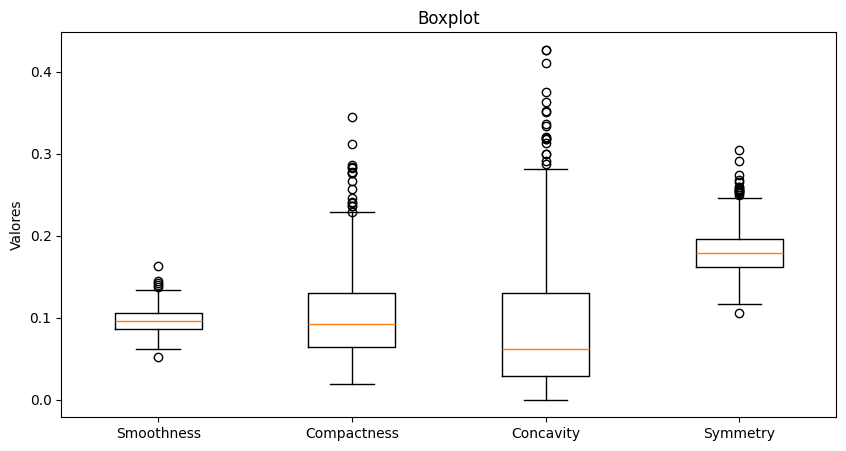

In [22]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_coluna1['smoothness1'],dataframe_coluna1['compactness1'],dataframe_coluna1['concavity1'],dataframe_coluna1['symmetry1']],
    tick_labels=['Smoothness', 'Compactness','Concavity', 'Symmetry']
)
plt.title(f'Boxplot')
plt.ylabel('Valores')
plt.show()

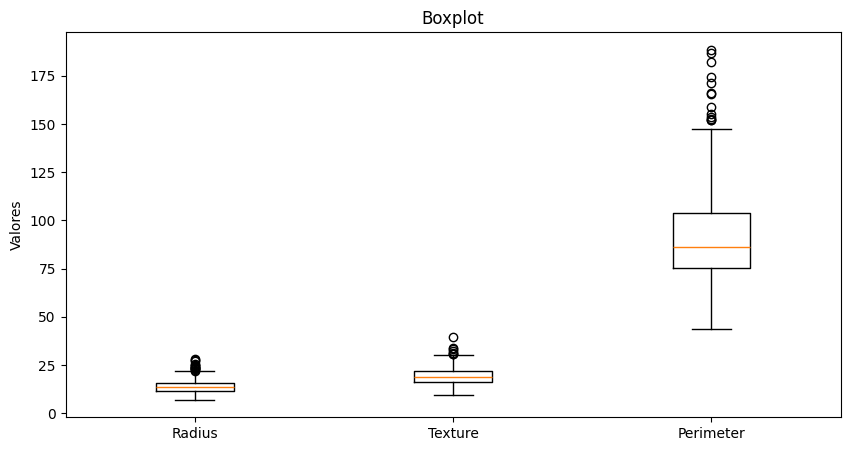

In [23]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_coluna1['radius1'],dataframe_coluna1['texture1'],dataframe_coluna1['perimeter1']],
    tick_labels=['Radius', 'Texture','Perimeter']
)
plt.title(f'Boxplot')
plt.ylabel('Valores')
plt.show()

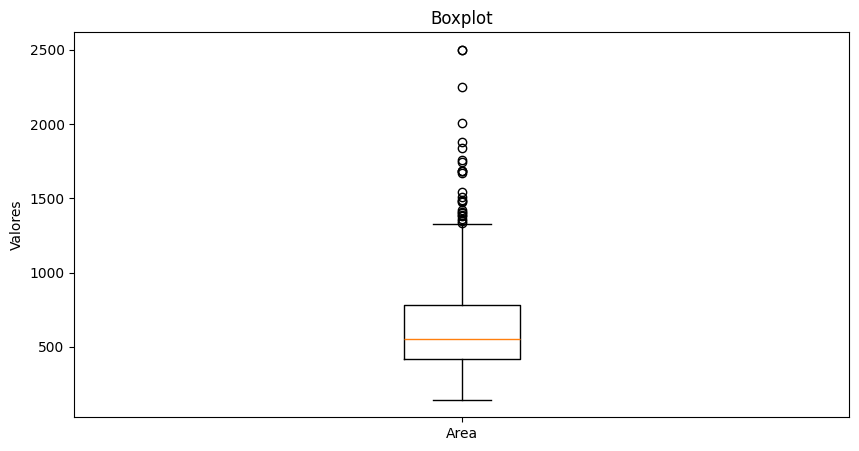

In [24]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_coluna1['area1']],
    tick_labels=['Area']
)
plt.title(f'Boxplot')
plt.ylabel('Valores')
plt.show()

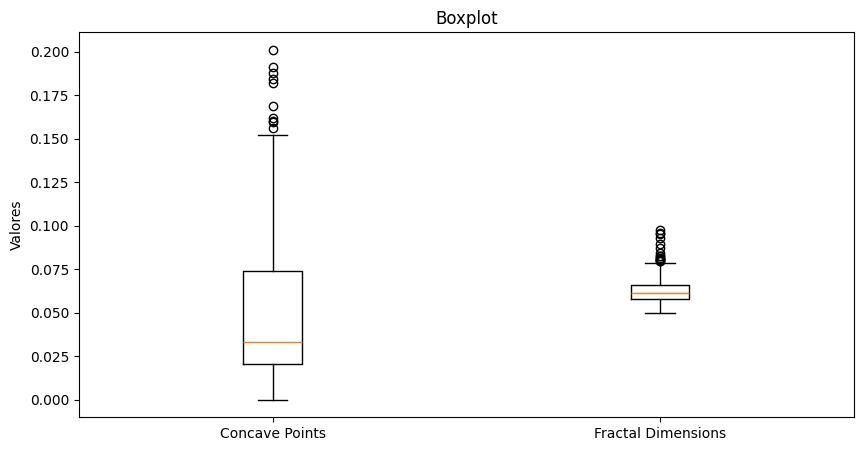

In [26]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_coluna1['concave_points1'],dataframe_coluna1['fractal_dimension1']],
    tick_labels=['Concave Points','Fractal Dimensions']
)
plt.title(f'Boxplot')
plt.ylabel('Valores')
plt.show()

Pela análise dos bloxpots é possível perceber uma alta quantidade de outliers para todos os atributos. Dos 10 atributos considerados, apenas dois apresentam outliers abaixo do limite inferior, a parte majoritária dos outliers estão concentrados após o limite superior, o que indica uma presença de ruído dentre os atributos.

Por meio da análise do artigo introdutório anexado ao dataset, podemos compreender melhor a relação entre oos atributos Concavity e Concave Points de modo a concluir-se que não pode-se haver valores para concavidade iguais a 0 ao mesmo tempo que há valores para o concave points diferente de 0. Abaixo segue a analise para verificar inconsistencia de dados:

In [35]:
linhas_concavity1_zero = dataframe_coluna1[dataframe_coluna1['concavity1'] == 0]
print("Linhas onde concavity1 é igual a 0:")
linhas_concavity1_zero

Linhas onde concavity1 é igual a 0:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422
174,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975
175,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,0.07098
473,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948


Como demonstrado acima, podemos concluir que não há inconsitencia no que tange a relação entre esses dois atributos.
Para analisar a incompletude dos dados, podemos verificar se há linhas do dataset onde não consta algum valor para determinado atributo de um objeto em específico. Abaixo segue a análise:

In [38]:
if dataframe.isnull().values.any():
    print("Existem valores em branco no DataFrame.")
else:
    print("Não há valores em branco no DataFrame.")

Não há valores em branco no DataFrame.


Sob esse viés, uma vez que não há atributos em branco, pode-se concluir tambem que não há linhas nem colunas em branco, ou seja, não existe incompletude dos dados.

### Questão 1 (E)

**Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.**

In [49]:
colunas=["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1"]
dataframe_quantitativos = dataframe[colunas]

covariancia = dataframe_quantitativos.cov()
print("Convariância dos atributos quantitativos")
covariancia

Convariância dos atributos quantitativos


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
radius1,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-0.007754
texture1,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-0.002321
perimeter1,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-0.044859
area1,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-0.703426
smoothness1,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,0.000058
compactness1,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,0.000211
concavity1,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,0.000190
concave_points1,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,0.000046
symmetry1,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,0.000093
fractal_dimension1,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,0.000050


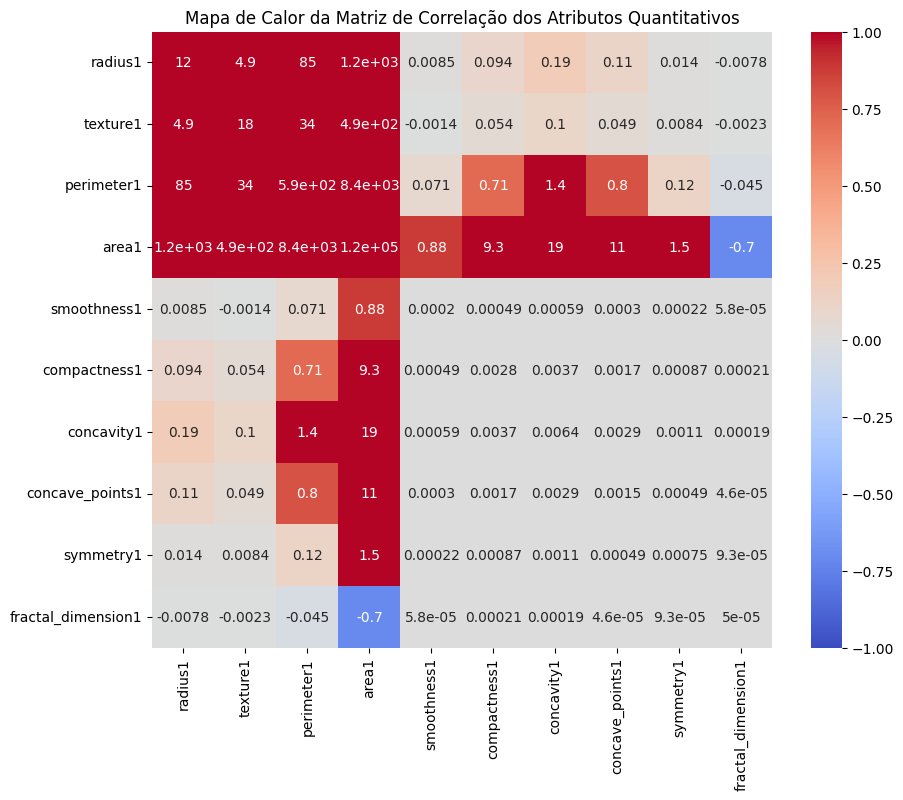

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(covariancia, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor da Matriz de Correlação dos Atributos Quantitativos")
plt.show()

In [44]:
correlacao = dataframe_quantitativos.corr()
print("Correlação dos atributos quantitativos")
correlacao

Correlação dos atributos quantitativos


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


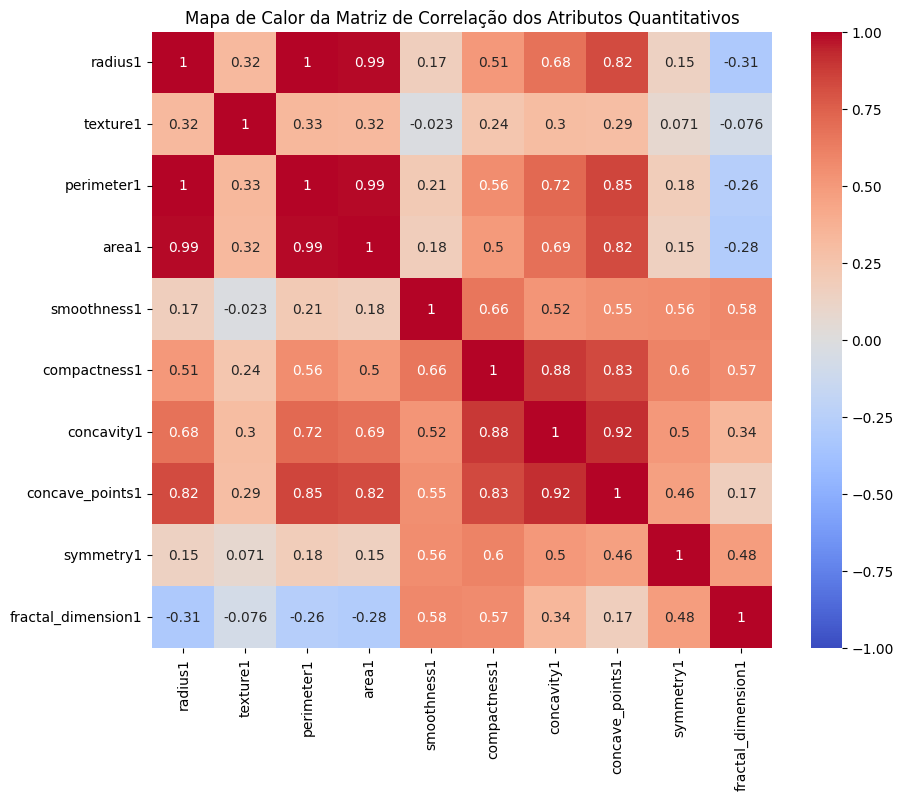

In [48]:
# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor da Matriz de Correlação dos Atributos Quantitativos")
plt.show()

### Questão 1 (F)

**Trace boxplots dos atributos preditivos e identifique a presença ou não de outliers.**

Para esta análise optou-se por utilizar **bloxsplots** para os objetos onde o diagnóstico era benigno e outros **bloxsplots** para os objetos onde o diagnotisco era malígno de forma a obter-se uma análise mais acurada dos outliers dado o fato de que as medidas para os benignos não viessem a influenciar nos malignos e vice versa.

Por meio do boxsplot é possível observar a distribuição dos valores para cada atributo, incluindo medidas estatisticas como a mediana, os quartis, e caso haja, **outliers**.

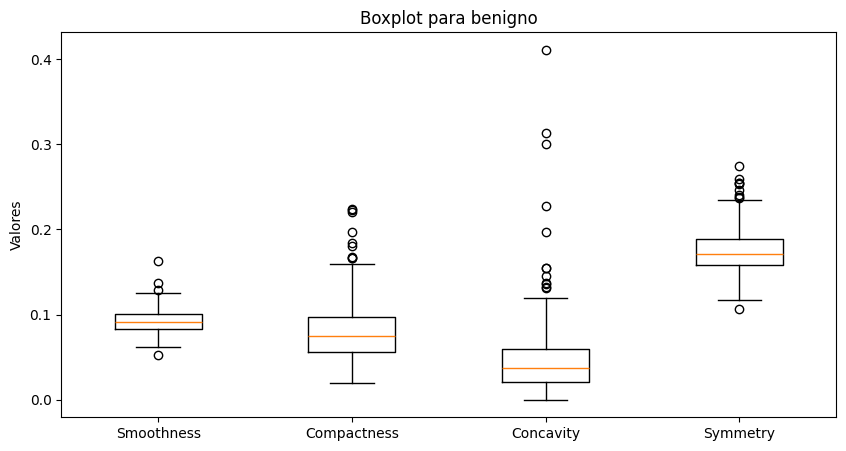

In [17]:
def separa_dataframe(DataFrame,value):
    dataframe_separado = dataframe[dataframe['Diagnosis'] == value]

    return dataframe_separado

dataframe_benigno = separa_dataframe(dataframe, 'B')
dataframe_maligno = separa_dataframe(dataframe, 'M')

atributos_numericos = dataframe_benigno.columns.drop('Diagnosis')
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_benigno['smoothness1'],dataframe_benigno['compactness1'],dataframe_benigno['concavity1'],dataframe_benigno['symmetry1']],
    tick_labels=['Smoothness', 'Compactness','Concavity', 'Symmetry']
)
plt.title(f'Boxplot para benigno')
plt.ylabel('Valores')
plt.show()

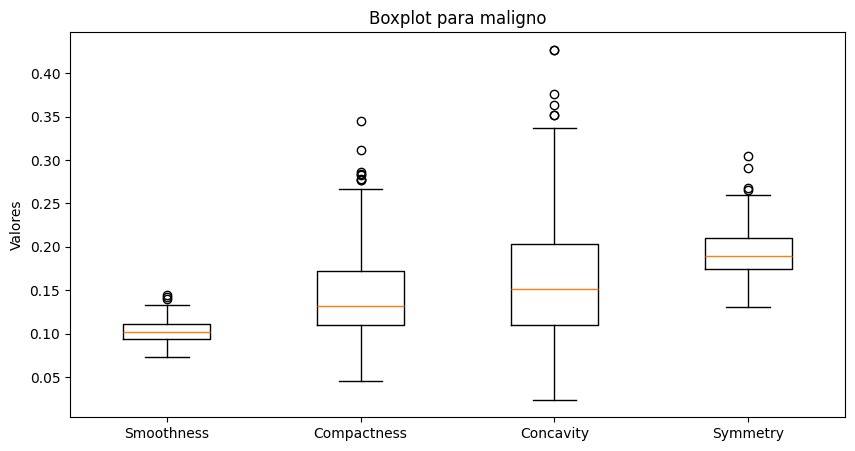

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_maligno['smoothness1'],dataframe_maligno['compactness1'],dataframe_maligno['concavity1'],dataframe_maligno['symmetry1']],
    tick_labels=['Smoothness', 'Compactness','Concavity', 'Symmetry']
)
plt.title(f'Boxplot para maligno')
plt.ylabel('Valores')
plt.show()

- **Somoothness**: a distribuição deste atributo se apresenta de forma relativamente homogenea com a presenta de alguns outliers para o valor maximo e um para o minimo, sendo que para os valores acima do limite superio apresentam-se de maneira mais concentrada tanto para beningno quanto para maligno
- **Compacteness**: para este atributo, é notável a diferença entre os objetos diagnosticados como malignos e benignos. Para o caso maligno, nota-se que o limite superior apresentou um valor muito maior do que o classificado como benigno. A presença de outliers é evidente, possuindo um intervalo de distribuição de tamanho semelhante, e distribuição dentro deste intervalo também semelhante. Assim também, dado a diferença significativa entre as medidas para ambos os diagnósticos, é notável que o atributo e seus valores possuem uma ampla relevância para o diagnóstico.
- **Concavity**: este atributo apresentou uma diferença considerável em relação aos diagnósticos benignos e malignos. O limite superior para os malignos se apresentou maior com um numero de outliers consideravelmente menor, enquanto o limite supoerior para os benignos se apresentou consideravelmente menor com um número de outliers muito maior.

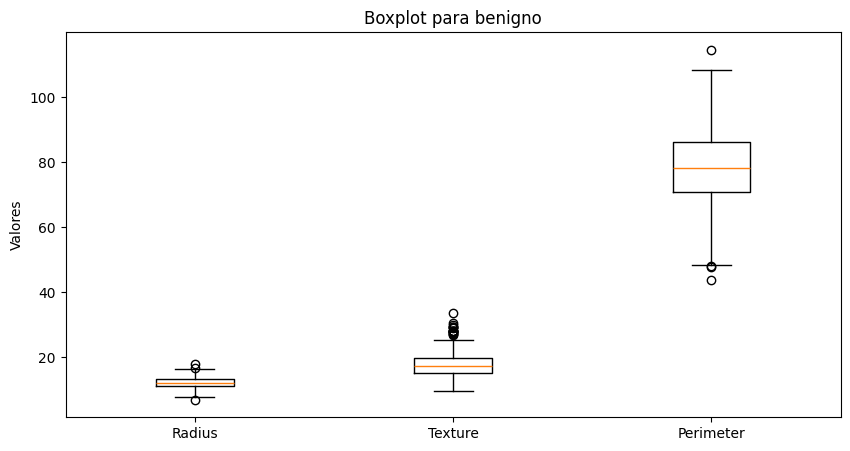

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_benigno['radius1'],dataframe_benigno['texture1'],dataframe_benigno['perimeter1']],
    tick_labels=['Radius', 'Texture','Perimeter']
)
plt.title(f'Boxplot para benigno')
plt.ylabel('Valores')
plt.show()

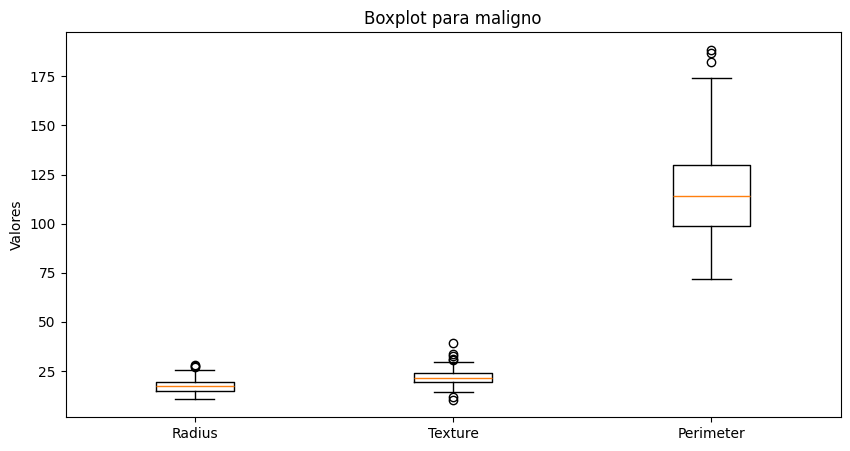

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_maligno['radius1'],dataframe_maligno['texture1'],dataframe_maligno['perimeter1']],
    tick_labels=['Radius', 'Texture','Perimeter']
)
plt.title(f'Boxplot para maligno')
plt.ylabel('Valores')
plt.show()

- **Radius**: comparando-se os dois boxplots, é perceptivel que as medidas para o Radius possuem um valor mais elevado quando se trat de tumores malignos, ao contrário do Radius para o benigno que apresena medidas menores. No que tange aos outliers, há presença de outliers se faz tanto para malignos quanto para benignos próximos aos limites superiores.
- **Texture**: para este atributo, quando comparado o diagnóstico para maligno com o beningno, é perceptivel a presença de outliers para os ambos os diagnósticos, sendo que o Testure para maligno apresenta outliers abaixo do limite inferior.
- **Perimeter**: para o Perimeter é possível notar que há outliers tanto para maligno quanto para benigno, entretantoo para o caso de tumores benignos há a presença de outliers abaixo do limite inferior. Sob esse viés, também é possível analisar que o Perimeter está diretamente ligado com o Diagnosis, sendo que quando menor o Perimeter o Diagnosis tende a ser benigno

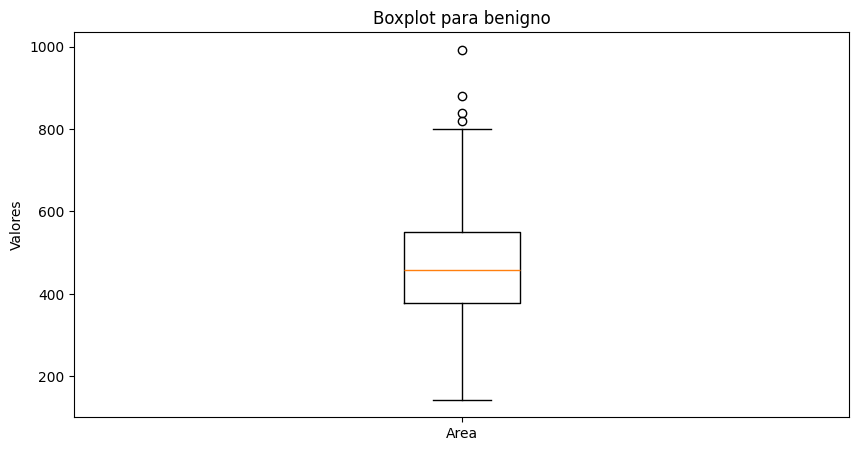

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_benigno['area1']],
    tick_labels=['Area']
)
plt.title(f'Boxplot para benigno')
plt.ylabel('Valores')
plt.show()

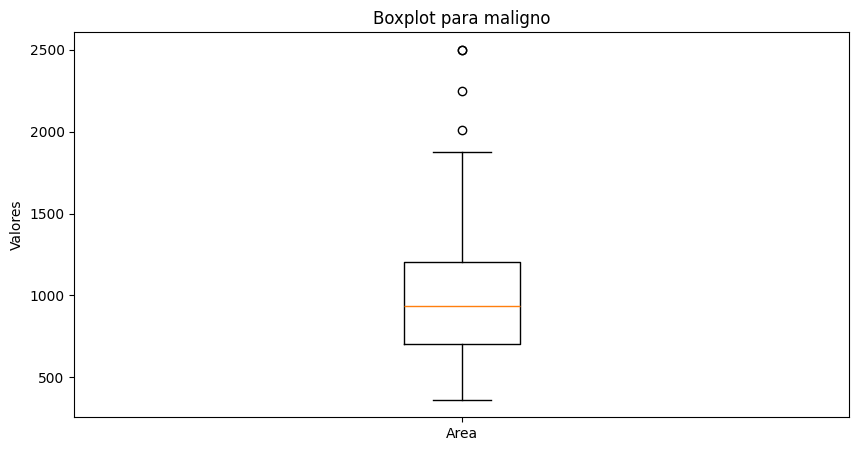

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_maligno['area1']],
    tick_labels=['Area']
)
plt.title(f'Boxplot para maligno')
plt.ylabel('Valores')
plt.show()

- **Área**: A presença de ouliers, tanto para beningnos quanto para malignos, se faz evidente. Entretanto, é notável que os valores para a área do tumor apresenta um valor consideravelmente para maior quando trata-se de tumores malignos, algo que se extende também para os outliers. Assim, é possivel concluir que a área do tumor possui uma relação direta com o diagnóstico, sendo que tumores maiores apresentam uma maior chance de serem malignos.

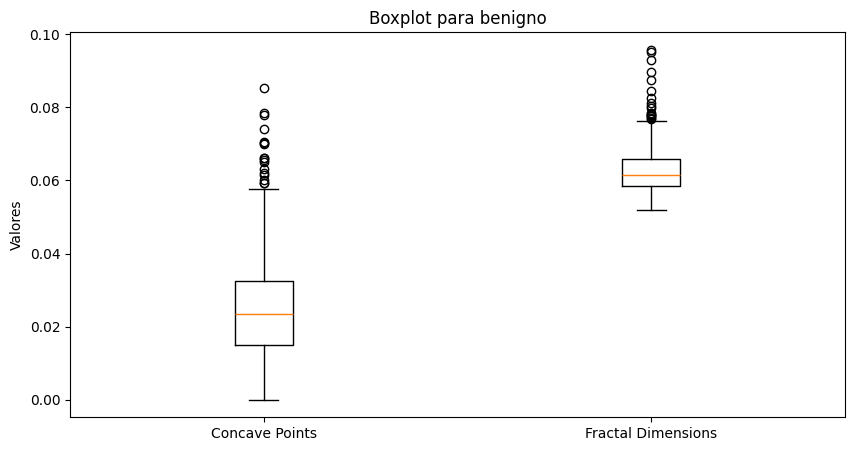

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_benigno['concave_points1'],dataframe_benigno['fractal_dimension1']],
    tick_labels=['Concave Points','Fractal Dimensions']
)
plt.title(f'Boxplot para benigno')
plt.ylabel('Valores')
plt.show()

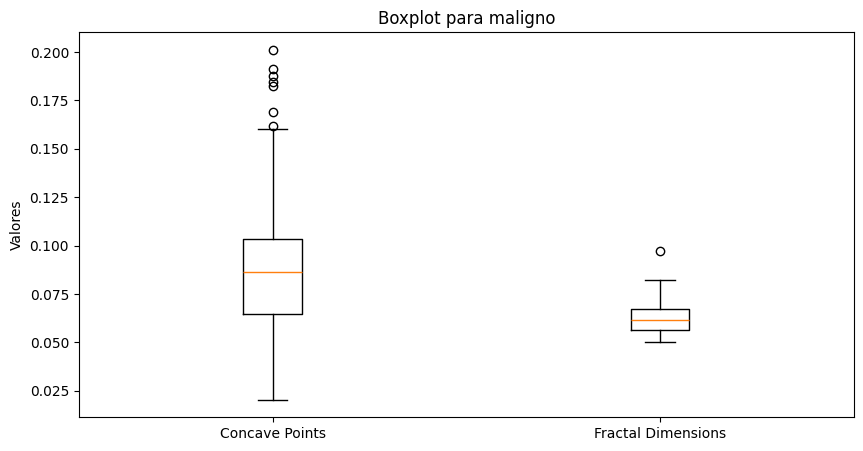

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [dataframe_maligno['concave_points1'],dataframe_maligno['fractal_dimension1']],
    tick_labels=['Concave Points','Fractal Dimensions']
)
plt.title(f'Boxplot para maligno')
plt.ylabel('Valores')
plt.show()

- **Concave Points**: a presença de outliers se faz perceptível em ambos Diagnosis sempre sendo acima do limite superior. Outra analise possível de se fazer vem do fato de que quando menor o valor do atributo Concave Points, mais o Diagnosis tende a ser benigno
- **Fractal Dimensions**: para este atributo, é claramente perceptível a presença de outlier para ambos os Diagnosis, porém o número de ouliers é evidentemente superior quando trata-se do Diagnosis benigno, o que indica que tal atributo possui um papel consideravelmente relevante para o diagnóstico do tumor

Baseado no artigo anexado na página do dataset e considerando a relação entre os atributos Concave Points e Concavity pode-se concluir que não podemos ter pontos de concavidade sem ter concavidade. Analisando os valores de concavidade iguais a 0, temos a seguinte relação:

### Questão 1 (G)

Para conduzir uma análise mais detalhada dos dados, optou-se pela utilização de estatística descritiva. A fim de extrair o máximo de informações relevantes, o conjunto de dados foi segmentado em 10 dataframes distintos, cada um correspondendo a um atributo preditivo.

Essa abordagem permite analisar o comportamento individual de cada atributo, bem como comparar os cenários entre instâncias classificadas como benignas e malignas. Para isso, emprega-se a representação gráfica por meio de histogramas, os quais possibilitam avaliar visualmente a distribuição dos dados, identificando padrões, tendências e possíveis anomalias.

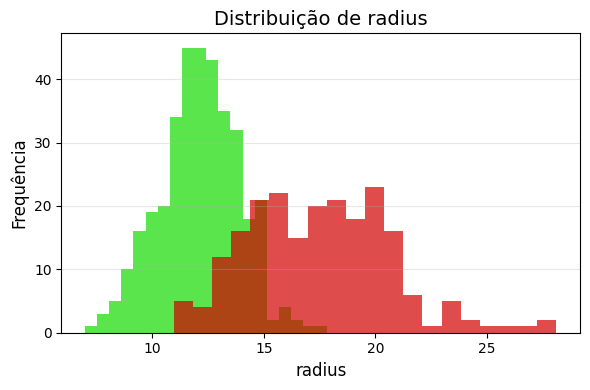

In [ ]:
df_atributos_x_diagnostics = []

for col in dataframe.columns[:-1]:  # Exclui a última coluna (Diagnosis)
    if col == "radius2":
        break
    # Cria um novo DataFrame com a coluna atual e Diagnosis
    df_temp = dataframe[[col, 'Diagnosis']]
    df_atributos_x_diagnostics.append(df_temp)

plt.figure(figsize=(6, 4))
df = df_atributos_x_diagnostics[0]
df_benigno = df[df['Diagnosis'] == "B"]
df_maligno = df[df['Diagnosis'] == "M"]

plt.hist(df_benigno['radius1'], bins=20, color='#16DB00', alpha=0.7)
plt.hist(df_maligno['radius1'], bins=20, color='#d00000', alpha=0.7)

plt.title(f'Distribuição de radius', fontsize=14)
plt.xlabel('radius', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

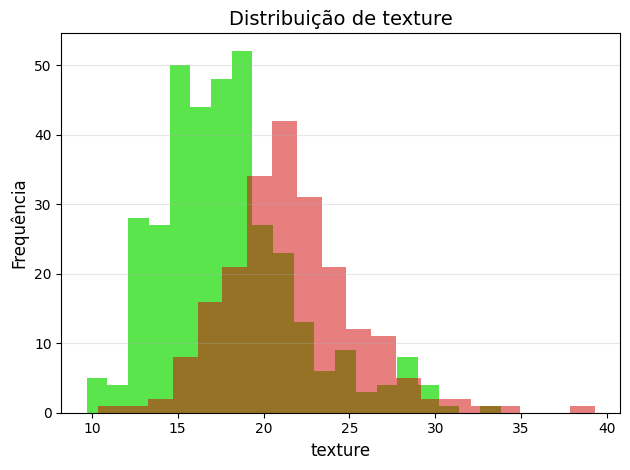

In [ ]:
df = df_atributos_x_diagnostics[1]
df_benigno = df[df['Diagnosis'] == "B"]
df_maligno = df[df['Diagnosis'] == "M"]

plt.hist(df_benigno['texture1'], bins=20, color='#16DB00', alpha=0.7)
plt.hist(df_maligno['texture1'], bins=20, color='#d00000', alpha=0.5)

plt.title(f'Distribuição de texture', fontsize=14)
plt.xlabel('texture', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Questão 1 (H)

### Questão 1 (I)